In [21]:
library(readxl)

In [189]:
# Import dataframe
raw_data <- read_excel('data.xlsx', sheet = 'Sheet1')

head(df, 2)

x,y
<dbl>,<dbl>
13,55
13,60


In [190]:
# Create a new data frame with standardized variables, optional
#df <- data.frame(std_x = scale(raw_data$x), std_y = scale(raw_data$y))
df <- data.frame(raw_data)

#x_values <- df$std_x
#y_values <- df$std_y
x_values <- df$x
y_values <- df$y

# Fit the regression model using standardized variables
#model <- lm(std_y ~ std_x, data = df)
model <- lm(y ~ x, data = df)

# View the model summary
summary_model <- summary(model)
print(summary_model)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.101  -5.805   1.542   7.114  15.899 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.0812     5.7083   6.321 0.000396 ***
x             1.3367     0.2145   6.232 0.000432 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.38 on 7 degrees of freedom
Multiple R-squared:  0.8473,	Adjusted R-squared:  0.8255 
F-statistic: 38.84 on 1 and 7 DF,  p-value: 0.0004315



In [191]:
mean_x <- mean(x_values)
mean_y <- mean(y_values)

sx <- sd(x_values)
sy <- sd(y_values)

corr <- cor(x_values, y_values)
corr

[1] 0.9204881

In [192]:
# a + bx

# b = r * (sy/sx)
linear.b <- corr * (sy / sx)
# a = mean_y - b * mean_x
linear.a <- mean_y - linear.b * mean_x

In [193]:
# SST (Total Sum of Squares)
sst <- sum((y_values - mean_y)^2)

# SSE (Residual Sum of Squares)
predicted_y <- linear.a + linear.b * x_values
sse <- sum((y_values - predicted_y)^2)

# SSR (Regression Sum of Squares)
ssr <- sst - sse

# R-squared
r_squared_direct <- ssr / sst

# Print results with rounded values
cat("Total Sum of Squares (SST):", round(sst, 4), "\n")
cat("Residual Sum of Squares (SSE):", round(sse, 4), "\n")
cat("Regression Sum of Squares (SSR):", round(ssr, 4), "\n")

# Print correlation coefficient squared and R-squared
print(corr^2, digits = 4)
cat("Coefficient of Determination (R^2):", round(r_squared_direct, 4), "\n")

Total Sum of Squares (SST): 5936 
Residual Sum of Squares (SSE): 906.4372 
Regression Sum of Squares (SSR): 5029.563 
[1] 0.8473
Coefficient of Determination (R^2): 0.8473 


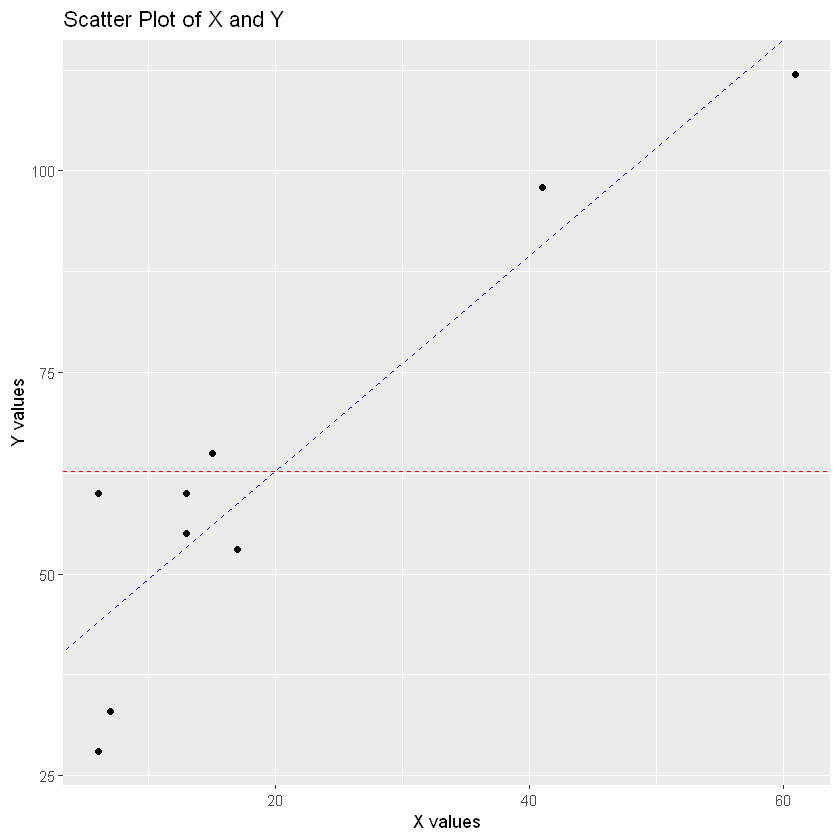

In [194]:
library(ggplot2)

ggplot(df, aes(x = x, y = y)) +
  geom_point() +
  geom_abline(intercept = linear.a, slope = linear.b, linetype = "dashed", color = "blue") +
  geom_hline(yintercept = mean_y, linetype = "dashed", color = "red") +  # Line the the mean
  labs(x = "X values", y = "Y values", title = "Scatter Plot of X and Y")

In [212]:
n <- length(x_values)
deg_f <- n - 2

In [213]:
#se <- summary_model$coefficients[, "Std. Error"]["std_x"]
se <- summary_model$coefficients[, "Std. Error"]["x"]

# b = summary_model$coefficients[, "Estimate"]["x"]

In [214]:
t_statistic = (linear.b - 0) / se
cat("t-statistic:", t_statistic, "\n")

t-statistic: 6.232256 


In [217]:
# Confidence Interval (95%)
t_critical <- qt(1 - 0.05 / 2, df = deg_f)
lb <- linear.b - t_critical * standard_errors["std_x"]
ub <- linear.b + t_critical * standard_errors["std_x"]

cat("lower bound:", lb, "\n")
cat("upper bound:", ub, "\n")

# Hypothesis Test (alpha = 0.05)
# H0: 𝛽 = 0 vs HA: 𝛽 ≠ 0
p = (1 - pt(t_statistic, df = deg_f)) * 2
cat("P Value:", p, "\n")
cat("Reject H0:", p < 0.05, "\n")

lower bound: 0.9874528 
upper bound: 1.685951 
P Value: 0.0004315097 
Reject H0: TRUE 
